# Семинар 1. Векторные и матричные нормы, унитарные матрицы

### Инвариантность евклидовой и первой векторной норм

Найти константы $C_1$ и $C_2$ такие что 

$$C_1\|x\|_2 \leq \|x\|_1 \leq C_2\|x\|_2$$

### Задача удаления шума

- Дано зашумлённое изображение $X_{noise}$
- Предположим, что оно получено с помощью добавления случайного шума $\varepsilon$ к исходному изображению $X_{origin}$ 

$$ X_{noise} = X_{origin} + \varepsilon $$

- Необходимо каким-то образом восстановить исходное изображение $\hat{X}_{origin}$:
    - $\hat{X}_{origin}$ должно несильно отличаться от данного зашумлённого изображения $X_{noise}$
    - в нём не должно быть шума
- Первое условие означает, что норма разности между изображениями мала
- Что означает второе условие?

#### Чем зашумлённая картинка отличается от исходной?



- Соседние пиксели имеют близкие значения
- Это значит, что 

$$\sum_{i, j = 1}^n|X_{ij} - X_{i+1,j}| + |X_{ij} - X_{i, j+1}| = \|\nabla X\|_1$$

- Таким образом, малость первой нормы градиента изображения может обеспечить минимум шума

### Итоговая оптимизационная задача

$$ \min_X \|X_{noise} - X\|^2_F + \lambda \|\nabla X\|_1 $$

- За что отвечает коэффициент $\lambda > 0$?

In [8]:
%matplotlib inline
import numpy as np
import scipy 
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral
import imageio

(-0.5, 369.5, 135.5, -0.5)

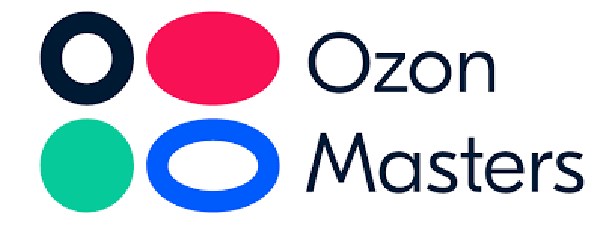

In [22]:
demo_im = imageio.imread("./ozon_masters.png")
plt.figure(figsize=(10, 8))
plt.imshow(demo_im)
plt.axis('off')

(-0.5, 369.5, 135.5, -0.5)

<Figure size 432x288 with 0 Axes>

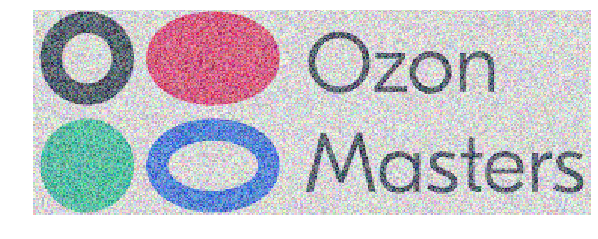

In [41]:
noisy = demo_im.copy() + 2.0 * demo_im.std() * np.random.random(demo_im.shape)
noisy -= np.min(noisy)
noisy /= np.max(noisy)

plt.gray()
plt.figure(figsize=(10, 8))
plt.imshow(noisy)
plt.axis('off')

In [44]:
denoised_im = denoise_tv_chambolle(noisy, weight=0.1, multichannel=True)

/Users/alex/anaconda3/lib/python3.6/site-packages/skimage/restoration/_denoise.py:226: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  g[slices_g] = np.diff(out, axis=ax)
/Users/alex/anaconda3/lib/python3.6/site-packages/skimage/restoration/_denoise.py:212: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  d[slices_d] += p[slices_p]


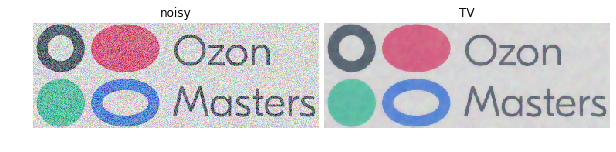

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
ax[0].imshow(noisy)
ax[0].axis('off')
ax[0].set_title('noisy')
ax[1].imshow(denoised_im)
ax[1].axis('off')
ax[1].set_title('TV')
fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)

#### Что отражает градиент изображения?

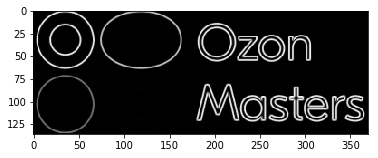

In [46]:
from skimage import filters
img_edges = filters.sobel(demo_im[:, :, 2])
plt.imshow(img_edges) 

### Свойство матрицы Хаусхолдера

Преобразование Хаусхолдера может занулить все элементы в столбце матрицы, кроме первого:

$$
    H \begin{bmatrix} \times \\ \times \\ \times \\ \times  \end{bmatrix} = 
      \begin{bmatrix} \times \\ 0 \\ 0 \\ 0  \end{bmatrix}.
$$

**Доказательство** Пусть $e_1 = (1,0,\dots, 0)^T$, тогда нам надо найти такой вектор $v$ что

$$
   H x = x - 2(v^* x) v = \alpha e_1,
$$

где $\alpha$ неизвестная константа. В силу унитарной инвариантности $\|\cdot\|_2$ мы получим

$$\|x\|_2 = \|Hx\|_2 = \|\alpha e_1\|_2 = |\alpha|.$$

и

$$\alpha = \pm \|x\|_2$$

Также, можем выращить $v$ из равенства $x - 2(v^* x) v = \alpha e_1$:

$$v = \dfrac{x-\alpha e_1}{2 v^* x}$$

Умножив последнее выражение на $x^*$ получим

$$
    x^* x - 2 (v^* x) x^* v = \alpha x_1;
$$
$$
    \|x\|_2^2 - 2 (v^* x)^2 = \alpha x_1
$$
$$
    (v^* x)^2 = \frac{\|x\|_2^2 - \alpha x_1}{2}.
$$

Итак, $v$ существует и равна
$$
    v = \dfrac{x \pm \|x\|_2 e_1}{2v^* x} = \dfrac{x \pm \|x\|_2 e_1}{\pm\sqrt{2(\|x\|_2^2 \mp \|x\|_2 x_1)}}.
$$

### Унитарная инвариантность фробениусовой и спектральной нормы матрицы

1. Покажем, что $\|AU\|_F = \|UA\|_F = \|A\|_F$, где $U$ – унитарная матрица
2. Покажем, что $\|AU\|_2 = \|UA\|_2 = \|A\|_2$, где $U$ – унитарная матрица